# EDA for Claims Data Set

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
#plt.rcParams["figure.facecolor"]= "w"
#pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
#pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
#plt.style.use('fivethirtyeight') 
#plt.style.use('bmh') 
#plt.rcParams.update(plt.rcParamsDefault)
#sns.set_theme()

## Understand the Data

At first, let’s find out what information the data set contains. We start off by reading in our data and will get a first overview of the data.

In [3]:
fema_policies = pd.read_csv('../data/FimaNfipPolicies.csv') #, parse_dates=['asOfDate','dateOfLoss','originalConstructionDate','originalNBDate'])

In [4]:
pd.options.display.max_columns = 42
fema_claims.head(10)

agricultureStructureIndicator                  asOfDate  \
0                            0.0  2021-07-24T00:00:00.000Z   
1                            0.0  2021-07-24T00:00:00.000Z   
2                            0.0  2021-11-20T00:00:00.000Z   
3                            0.0  2021-11-20T00:00:00.000Z   
4                            0.0  2021-11-20T00:00:00.000Z   
5                            0.0  2021-11-20T00:00:00.000Z   
6                            0.0  2022-04-16T00:00:00.000Z   
7                            0.0  2021-11-20T00:00:00.000Z   
8                            0.0  2021-11-20T00:00:00.000Z   
9                            0.0  2021-07-24T00:00:00.000Z   

   baseFloodElevation  basementEnclosureCrawlspace             reportedCity  \
0                 NaN                          1.0  Temporarily Unavailable   
1                 NaN                          NaN  Temporarily Unavailable   
2                50.0                          NaN  Temporarily Unavailable   
3                 9.0                          NaN  Temporarily Unavailable   
4                 NaN                          NaN  Temporarily Unavailable   
5                 NaN                          NaN  Temporarily Unavailable   
6                 NaN                          NaN  Temporarily Unavailable   
7                 NaN                          NaN  Temporarily Unavailable   
8                 NaN                          NaN  Temporarily Unavailable   
9                 NaN                          NaN  Temporarily Unavailable   

  condominiumIndicator  policyCount  countyCode  \
0                    N          1.0     24033.0   
1                    N          1.0     30009.0   
2                    N          1.0     48201.0   
3                    N          1.0     12103.0   
4                    N          1.0     24029.0   
5                    N          1.0     48201.0   
6                    N          1.0     45019.0   
7                    N          1.0     51095.0   
8                    N          1.0     12033.0   
9                    N          1.0     48293.0   

   communityRatingSystemDiscount                dateOfLoss  \
0                            5.0  2007-01-01T00:00:00.000Z   
1                            NaN  2011-07-12T00:00:00.000Z   
2                            5.0  2001-06-09T00:00:00.000Z   
3                            5.0  1996-10-07T00:00:00.000Z   
4                            NaN  2003-09-19T00:00:00.000Z   
5                           10.0  2001-06-05T00:00:00.000Z   
6                            4.0  1989-09-22T00:00:00.000Z   
7                            7.0  1999-09-15T00:00:00.000Z   
8                            5.0  2004-09-16T00:00:00.000Z   
9                            NaN  2010-06-09T00:00:00.000Z   

   elevatedBuildingIndicator  elevationCertificateIndicator  \
0                        0.0                            NaN   
1                        1.0                            NaN   
2                        0.0                            3.0   
3                        1.0                            NaN   
4                        1.0                            NaN   
5                        0.0                            NaN   
6                        0.0                            NaN   
7                        0.0                            NaN   
8                        1.0                            NaN   
9                        0.0                            NaN   

   elevationDifference   censusTract floodZone  houseWorship  latitude  \
0                  NaN  2.403380e+10         X           0.0      38.8   
1                  NaN  3.000900e+10        AE           0.0      45.2   
2                  0.0  4.820141e+10        AE           0.0      29.7   
3                  0.0  1.210302e+10        AE           0.0      27.9   
4                  NaN  2.402995e+10        AE           0.0      39.1   
5                  NaN  4.820142e+10         X           0.0      2

In [49]:
fema_claims.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'reportedCity', 'condominiumIndicator',
       'policyCount', 'countyCode', 'communityRatingSystemDiscount',
       'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference', 'censusTract',
       'floodZone', 'houseWorship', 'latitude', 'longitude',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryReside

In [50]:
fema_claims.shape

(2570089, 40)

In [51]:
fema_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570089 entries, 0 to 2570088
Data columns (total 40 columns):
 #   Column                                      Dtype              
---  ------                                      -----              
 0   agricultureStructureIndicator               float64            
 1   asOfDate                                    datetime64[ns, UTC]
 2   baseFloodElevation                          float64            
 3   basementEnclosureCrawlspace                 float64            
 4   reportedCity                                object             
 5   condominiumIndicator                        object             
 6   policyCount                                 float64            
 7   countyCode                                  float64            
 8   communityRatingSystemDiscount               float64            
 9   dateOfLoss                                  datetime64[ns, UTC]
 10  elevatedBuildingIndicator                   float64   

In [52]:
fema_claims.describe()

agricultureStructureIndicator  baseFloodElevation  \
count                   2.570034e+06       610385.000000   
mean                    1.459125e-04          124.662274   
std                     1.207854e-02          739.173343   
min                     0.000000e+00        -9998.000000   
25%                     0.000000e+00            6.000000   
50%                     0.000000e+00            9.000000   
75%                     0.000000e+00           15.000000   
max                     1.000000e+00         9998.000000   

       basementEnclosureCrawlspace   policyCount    countyCode  \
count                772192.000000  2.570034e+06  2.526274e+06   
mean                      1.277273  1.263506e+00  3.012946e+04   
std                       1.055056  6.453059e+00  1.455791e+04   
min                       0.000000  1.000000e+00  1.000000e+00   
25%                       0.000000  1.000000e+00  2.201900e+04   
50%                       1.000000  1.000000e+00  2.911900e+04   
75%                       2.000000  1.000000e+00  4.207900e+04   
max                       4.000000  1.090000e+03  7.803000e+04   

       communityRatingSystemDiscount  elevatedBuildingIndicator  \
count                   1.633976e+06               2.570034e+06   
mean                    6.548897e+00               1.831980e-01   
std                     1.530129e+00               3.868288e-01   
min                     1.000000e+00               0.000000e+00   
25%                     5.000000e+00               0.000000e+00   
50%                     7.000000e+00               0.000000e+00   
75%                     7.000000e+00               0.000000e+00   
max                     1.000000e+01               1.000000e+00   

       elevationCertificateIndicator  elevationDifference   censusTract  \
count                  587817.000000        683979.000000  2.432047e+06   
mean                        1.892883             1.375946  3.001835e+10   
std                         0.968825            17.347170  1.445380e+10   
min                         1.000000         -9989.000000  1.001020e+09   
25%                         1.000000             0.000000  2.201900e+10   
50%                         1.000000             1.000000  2.911197e+10   
75%                         3.000000             3.000000  4.206595e+10   
max                         4.000000           998.000000  7.803096e+10   

       houseWorship      latitude     longitude  locationOfContents  \
count  2.570034e+06  2.530098e+06  2.530098e+06        2.570089e+06   
mean   8.081605e-04  3.400306e+01 -8.618463e+01        2.158407e+00   
std    2.841668e-02  5.785843e+00  1.106293e+01        1.699126e+00   
min    0.000000e+00 -3.600000e+01 -1.707000e+02        0.000000e+00   
25%    0.000000e+00  2.990000e+01 -9.150000e+01        0.000000e+00   
50%    0.000000e+00  3.130000e+01 -8.750000e+01        3.000000e+00   
75%    0.000000e+00  3.990000e+01 -7.700000e+01        3.000000e+00   
max    1.000000e+00  6.990000e+01  1.740000e+02        7.000000e+00   

       lowestAdjacentGrade  lowestFloorElevation  \
count        462704.000000          2.570089e+06   
mean             73.214896          2.770530e+01   
std             371.584888          3.626490e+02   
min           -9999.900000         -6.002000e+03   
25%               2.700000          0.000000e+00   
50%               6.100000          0.000000e+00   
75%              11.900000          0.000000e+00   
max            9998.900000          9.998000e+03   

       numberOfFloorsInTheInsuredBuilding  nonProfitIndicator  \
count                        2.552639e+06        2.570034e+06   
mean                         1.750146e+00        1.007380e-03   
std                          8.920402e-01        3.172326e-02   
min                          1.000000e+00        0.000000e+00   
25%                          1.000000e+00        0.000000e+00   
50%                          2.000000e+00        0.000000e+00   
75%                        

### Initial Observations and Assumptions about the Dataset

#### Data Types
+ 

#### Further Observations

+ 

### Explore and Clean the Data

##### Duplicates and Missing Values

First, let’s check for duplicates.

In [53]:
fema_claims.id.duplicated().sum()

0

In [54]:
# set 'keep=False' in the duplicated function to get all the duplicate items without eliminating 
# duplicate rows.
#df[df.id.duplicated(keep=False)].sort_values('id')

In [55]:
# replace missing values in column by NaN
#df.sqft_basement = df.sqft_basement.replace('?', np.nan)

In [56]:
#df.sqft_basement.value_counts(dropna=False)

In [57]:
# displays sum of missing values per column
fema_claims.isnull().sum()

agricultureStructureIndicator                      55
asOfDate                                            0
baseFloodElevation                            1959704
basementEnclosureCrawlspace                   1797897
reportedCity                                        0
condominiumIndicator                            41590
policyCount                                        55
countyCode                                      43815
communityRatingSystemDiscount                  936113
dateOfLoss                                          0
elevatedBuildingIndicator                          55
elevationCertificateIndicator                 1982272
elevationDifference                           1886110
censusTract                                    138042
floodZone                                      143408
houseWorship                                       55
latitude                                        39991
longitude                                       39991
locationOfContents          

In [58]:
fema_claims[fema_claims.originalNBDate.isna()]

agricultureStructureIndicator                  asOfDate  \
3196                               NaN 2021-11-19 00:00:00+00:00   
3199                               NaN 2021-11-19 00:00:00+00:00   
69798                              NaN 2021-11-24 00:00:00+00:00   
87516                              NaN 2021-08-03 00:00:00+00:00   
87520                              NaN 2021-08-03 00:00:00+00:00   
...                                ...                       ...   
2092716                            NaN 2021-11-19 00:00:00+00:00   
2094074                            NaN 2021-11-19 00:00:00+00:00   
2310245                            NaN 2022-04-11 00:00:00+00:00   
2433353                            NaN 2022-02-25 00:00:00+00:00   
2524514                            NaN 2022-03-21 00:00:00+00:00   

         baseFloodElevation  basementEnclosureCrawlspace  \
3196                    NaN                          NaN   
3199                    NaN                          NaN   
69798                   NaN                          NaN   
87516                   NaN                          NaN   
87520                   NaN                          NaN   
...                     ...                          ...   
2092716                 NaN                          NaN   
2094074                 NaN                          NaN   
2310245                 NaN                          NaN   
2433353                 NaN                          NaN   
2524514                 NaN                          NaN   

                    reportedCity condominiumIndicator  policyCount  \
3196     Temporarily Unavailable                  NaN          NaN   
3199     Temporarily Unavailable                  NaN          NaN   
69798    Temporarily Unavailable                    N          NaN   
87516    Temporarily Unavailable                    N          NaN   
87520    Temporarily Unavailable                    N          NaN   
...                          ...                  ...          ...   
2092716  Temporarily Unavailable                    N          NaN   
2094074  Temporarily Unavailable                    N          NaN   
2310245  Temporarily Unavailable                  NaN          NaN   
2433353  Temporarily Unavailable                    N          NaN   
2524514  Temporarily Unavailable                  NaN          NaN   

         countyCode  communityRatingSystemDiscount                dateOfLoss  \
3196            NaN                            NaN 1993-03-13 00:00:00+00:00   
3199        12115.0                            NaN 1992-06-26 00:00:00+00:00   
69798       26163.0                            NaN 2014-08-11 00:00:00+00:00   
87516       26163.0                            NaN 2014-08-11 00:00:00+00:00   
87520       26163.0                            NaN 2016-07-08 00:00:00+00:00   
...             ...                            ...                       ...   
2092716     53033.0                            NaN 1985-11-04 00:00:00+00:00   
2094074     48245.0                            NaN 2019-09-20 00:00:00+00:00   
2310245         NaN                            NaN 2021-12-06 00:00:00+00:00   
2433353     12011.0                            NaN 2020-10-25 00:00:00+00:00   
2524514         NaN                            NaN 2022-03-02 00:00:00+00:00   

         elevatedBuildingIndicator  elevationCertificateIndicator  \
3196                           NaN                            NaN   
3199                           NaN                            NaN   
69798                          NaN                            NaN   
87516                          NaN                            NaN   
87520                          NaN                            NaN   
...                            ...                            ...   
2092716                        NaN                            NaN   
2094074                        NaN                            NaN   
2310245                        NaN              

In [59]:
df.sqft_basement = df.sqft_basement.astype(float)
# = pd.to_numeric(df.sqft_basement)
#.astype(int(float('0.0')))

NameError: name 'df' is not defined

In [ ]:
df.sqft_basement.value_counts(dropna=False)

0.00        12826
NaN           454
600.00        217
500.00        209
700.00        208
            ...  
1,920.00        1
3,480.00        1
2,730.00        1
2,720.00        1
248.00          1
Name: sqft_basement, Length: 304, dtype: int64

In [ ]:
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')

In [ ]:
# testing = df.copy()
# testing.yr_renovated = testing.yr_renovated.astype('str').str.strip('.0').replace({'':'0000', 'nan':'0000'}).head()
# testing.yr_renovated = pd.to_datetime(testing.yr_renovated, format='%Y')
# testing.head()

In [ ]:
# condition seems to be a categorical value; let’s have a look at the min and max in order to find out the likely 
# range (n.b. the scale might be different as there might be values beyond max and min)
print('Min value for condition:', df.condition.min())
print('Max value for condition:', df.condition.max())

# same for grade; we might conclude, there is a ranking from 1–15
print('Min value for grade:', df.grade.min())
print('Max value for grade:', df.grade.max())

# and let’s also have a look at the time period of data collected
print('The data set contains values ranging from:', df.date.min().strftime('%b %d, %Y to'), df.date.max().strftime('%b %d, %Y.'))

Min value for condition: 1
Max value for condition: 5
Min value for grade: 3
Max value for grade: 13
The data set contains values ranging from: May 02, 2014 to May 27, 2015.


In [ ]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221,900.00         3       1.00         1180   
1  6414100192 2014-12-09 538,000.00         3       2.25         2570   
2  5631500400 2015-02-25 180,000.00         2       1.00          770   
3  2487200875 2014-12-09 604,000.00         4       3.00         1960   
4  1954400510 2015-02-18 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00         NaN  0.00  ...      7        1180           0.00   
1      7242    2.00        0.00  0.00  ...      7        2170         400.00   
2     10000    1.00        0.00  0.00  ...      6         770           0.00   
3      5000    1.00        0.00  0.00  ...      7        1050         910.00   
4      8080    1.00        0.00  0.00  ...      8        1680           0.00   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955          0.00    98178 47.51 -122.26           1340        5650  
1      1951      1,991.00    98125 47.72 -122.32           1690        7639  
2      1933           NaN    98028 47.74 -122.23           2720        8062  
3      1965          0.00    98136 47.52 -122.39           1360        5000  
4      1987          0.00    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

<AxesSubplot: xlabel='long', ylabel='lat'>

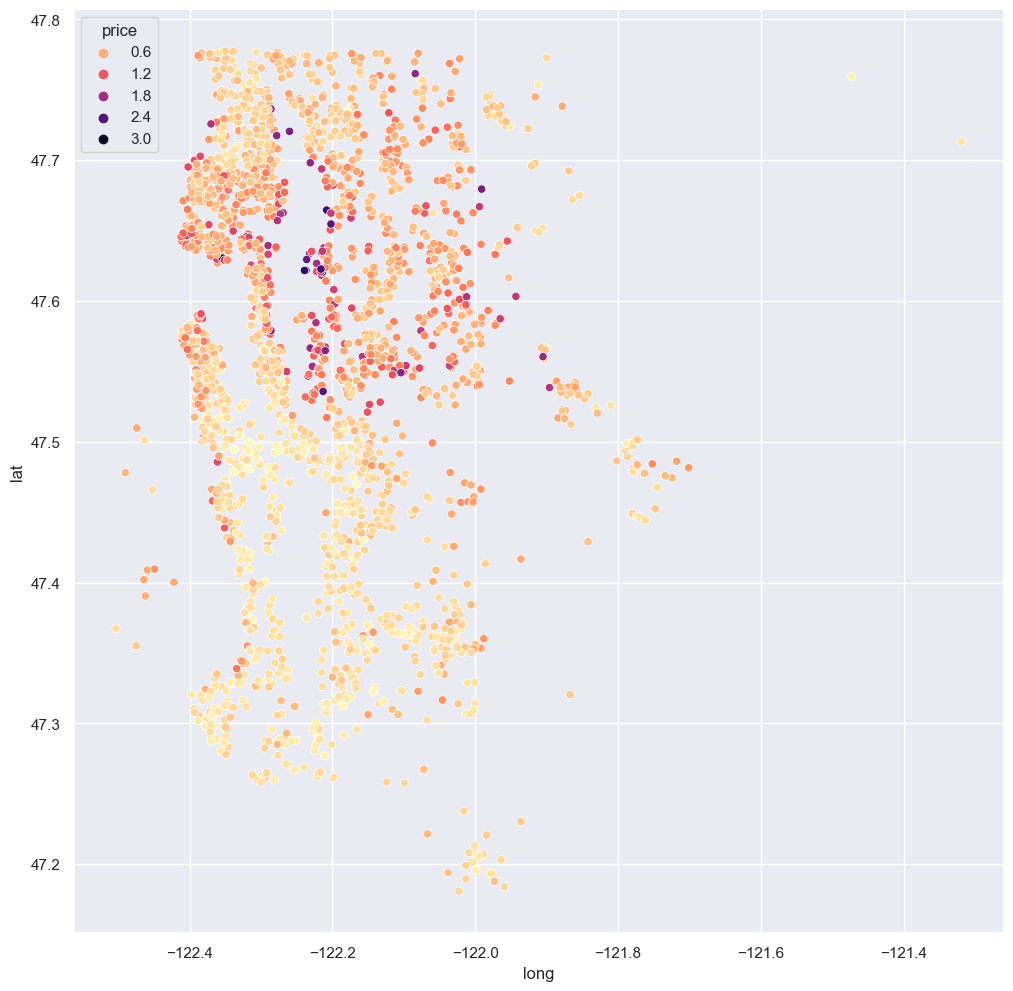

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df[df.waterfront.isna()], x='long', y='lat', hue='price', palette='magma_r')

In [ ]:
# waterfront is a boolean value; where, most likely 1 = True and 0 = False
df.waterfront.value_counts(dropna=False)

0.00    19075
NaN      2376
1.00      146
Name: waterfront, dtype: int64

In [ ]:
df.view.value_counts()
#df.yr_renovated

0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64

In [ ]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
df[df.yr_renovated == 0.0].shape
#.value_counts(dropna=False)

(17011, 21)

In [ ]:
df.yr_renovated.value_counts(dropna=False)

0.00        17011
NaN          3842
2,014.00       73
2,013.00       31
2,003.00       31
            ...  
1,948.00        1
1,946.00        1
1,976.00        1
1,951.00        1
1,971.00        1
Name: yr_renovated, Length: 71, dtype: int64

In [ ]:
df.view.value_counts(dropna=False)

0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
NaN        63
Name: view, dtype: int64

The sqft_basement contains null values that aren’t properly encoded, so let’s fix that.

Plotting the missing values in the waterfront column onto a map shows that the vast majority of them are not waterfront (some are, but they seem to be in the double digits). Hence, we’ll just replace them all by 0, i.e. False.

In [ ]:
df.waterfront = df.waterfront.fillna(0)

Let’s create a new column with the month of the sell, so that we can have a look a possible seasonal pattern.

In [ ]:
df['month'] = df['date'].dt.month

In [ ]:
df['age'] = df.yr_built.max()-df.yr_built

In [ ]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221,900.00         3       1.00         1180   
1  6414100192 2014-12-09 538,000.00         3       2.25         2570   
2  5631500400 2015-02-25 180,000.00         2       1.00          770   
3  2487200875 2014-12-09 604,000.00         4       3.00         1960   
4  1954400510 2015-02-18 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650    1.00        0.00  0.00  ...           0.00      1955   
1      7242    2.00        0.00  0.00  ...         400.00      1951   
2     10000    1.00        0.00  0.00  ...           0.00      1933   
3      5000    1.00        0.00  0.00  ...         910.00      1965   
4      8080    1.00        0.00  0.00  ...           0.00      1987   

   yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  month  age  
0          0.00    98178 47.51 -122.26           1340        5650     10   60  
1      1,991.00    98125 47.72 -122.32           1690        7639     12   64  
2           NaN    98028 47.74 -122.23           2720        8062      2   82  
3          0.00    98136 47.52 -122.39           1360        5000     12   50  
4          0.00    98074 47.62 -122.05           1800        7503      2   28  

[5 rows x 23 columns]

And finally, we’re dropping the columns we no longer need.

In [ ]:
df.drop('yr_renovated', axis=1, inplace=True)

#### Descriptive Statistics, again

In [ ]:
df.describe()

id        price  bedrooms  bathrooms  sqft_living  \
count        21,597.00    21,597.00 21,597.00  21,597.00    21,597.00   
mean  4,580,474,287.77   540,296.57      3.37       2.12     2,080.32   
std   2,876,735,715.75   367,368.14      0.93       0.77       918.11   
min       1,000,102.00    78,000.00      1.00       0.50       370.00   
25%   2,123,049,175.00   322,000.00      3.00       1.75     1,430.00   
50%   3,904,930,410.00   450,000.00      3.00       2.25     1,910.00   
75%   7,308,900,490.00   645,000.00      4.00       2.50     2,550.00   
max   9,900,000,190.00 7,700,000.00     33.00       8.00    13,540.00   

          sqft_lot    floors  waterfront      view  condition  ...  \
count    21,597.00 21,597.00   21,597.00 21,534.00  21,597.00  ...   
mean     15,099.41      1.49        0.01      0.23       3.41  ...   
std      41,412.64      0.54        0.08      0.77       0.65  ...   
min         520.00      1.00        0.00      0.00       1.00  ...   
25%       5,040.00      1.00        0.00      0.00       3.00  ...   
50%       7,618.00      1.50        0.00      0.00       3.00  ...   
75%      10,685.00      2.00        0.00      0.00       4.00  ...   
max   1,651,359.00      3.50        1.00      4.00       5.00  ...   

       sqft_above  sqft_basement  yr_built   zipcode       lat      long  \
count   21,597.00      21,143.00 21,597.00 21,597.00 21,597.00 21,597.00   
mean     1,788.60         291.85  1,971.00 98,077.95     47.56   -122.21   
std        827.76         442.50     29.38     53.51      0.14      0.14   
min        370.00           0.00  1,900.00 98,001.00     47.16   -122.52   
25%      1,190.00           0.00  1,951.00 98,033.00     47.47   -122.33   
50%      1,560.00           0.00  1,975.00 98,065.00     47.57   -122.23   
75%      2,210.00         560.00  1,997.00 98,118.00     47.68   -122.12   
max      9,410.00       4,820.00  2,015.00 98,199.00     47.78   -121.31   

       sqft_living15  sqft_lot15     month       age  
count      21,597.00   21,597.00 21,597.00 21,597.00  
mean        1,986.62   12,758.28      6.57     44.00  
std           685.23   27,274.44      3.12     29.38  
min           399.00      651.00      1.00      0.00  
25%         1,490.00    5,100.00      4.00     18.00  
50%         1,840.00    7,620.00      6.00     40.00  
75%         2,360.00   10,083.00      9.00     64.00  
max         6,210.00  871,200.00     12.00    115.00  

[8 rows x 21 columns]

### Data Visualization

#### Distribution

We’ll start off with a few plots regarding the distribution of the feature that we think allow us to search for properties in poor neighborhoods.

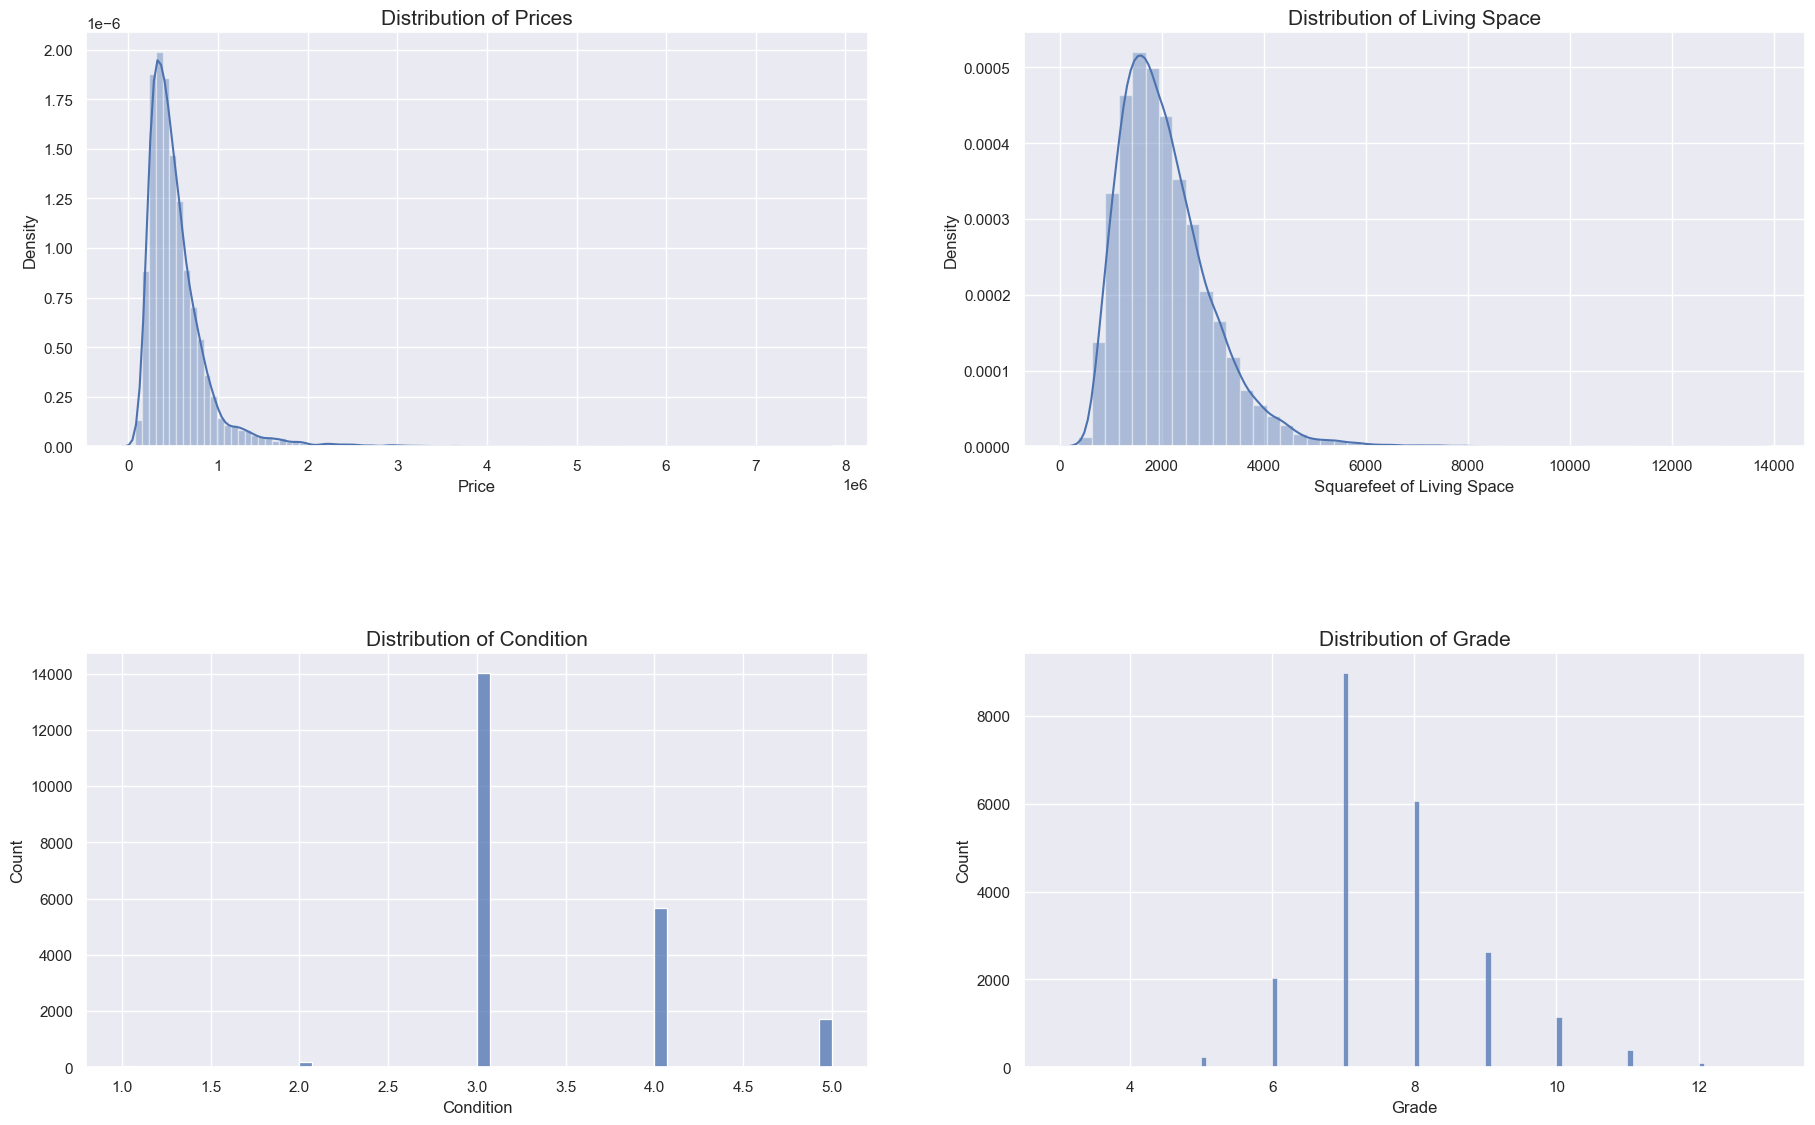

In [ ]:
fig = plt.figure(figsize = (18,12)) # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot) # add_subplot(1, 2, 1)
ax1 = fig.add_subplot(222) # add subplot 2 (1 row, 2 columns, second plot). See tip below** # add_subplot(1, 2, 2)
ax2 = fig.add_subplot(223) # add subplot 2 (1 row, 2 columns, second plot). See tip below** # add_subplot(1, 2, 2)
ax3 = fig.add_subplot(224) # add subplot 2 (1 row, 2 columns, second plot). See tip below** # add_subplot(1, 2, 2)

fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

sns.distplot(df.price, bins=100, ax=ax0)
ax0.set_xlabel("Price")
ax0.set_title("Distribution of Prices", fontsize = 15); # sets title for subplot

sns.distplot(df.sqft_living, ax=ax1)
ax1.set_xlabel("Squarefeet of Living Space")
ax1.set_title("Distribution of Living Space", fontsize = 15);

sns.histplot(df.condition, ax=ax2)
ax2.set_xlabel("Condition")
ax2.set_title("Distribution of Condition", fontsize = 15);

sns.histplot(df.grade, ax=ax3)
ax3.set_xlabel("Grade")
ax3.set_title("Distribution of Grade", fontsize = 15);


##### Observations

+ both, price and sqft_living are right skewed, so we can expect quite many or quite big outliers there
+ the distributions for condition shows that the vast majority of properties center around the middle – which draws into question how meaningful this feature actually is
+ grades are show a rather normal distribution


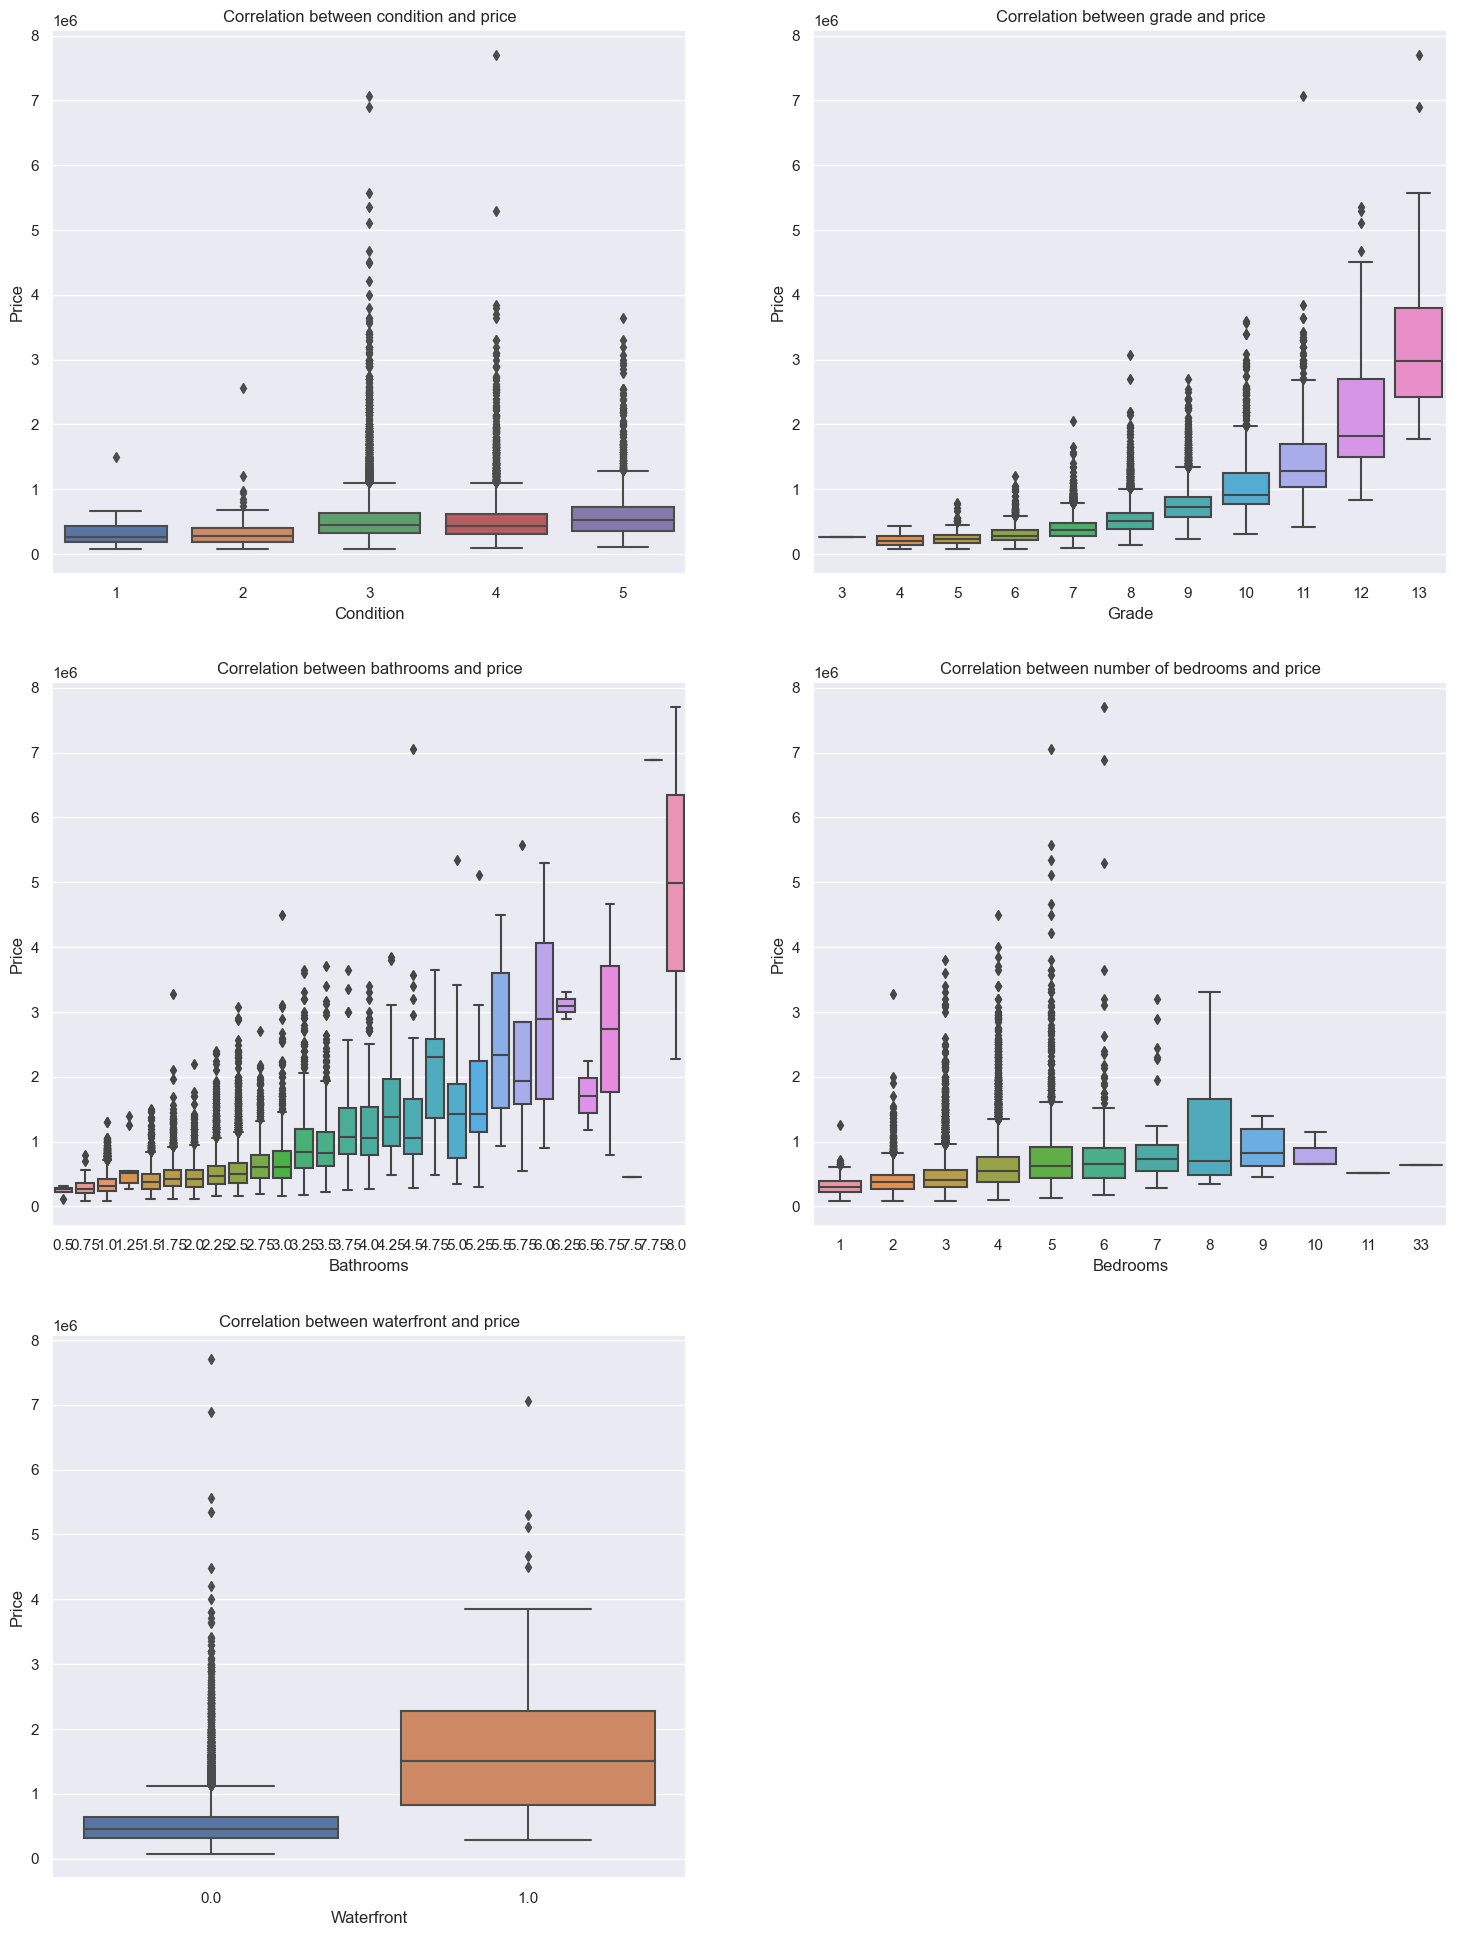

In [ ]:
fig = plt.figure(figsize = (18,24)) # create figure

ax0 = fig.add_subplot(321) # add subplot 1 (1 row, 2 columns, first plot) # add_subplot(1, 2, 1)
ax1 = fig.add_subplot(322) # add subplot 2 (1 row, 2 columns, second plot). See tip below** # add_subplot(1, 2, 2)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)

# Subplot 1:
sns.boxplot(x='bathrooms',y='price',data=df, ax=ax2)
ax2.set_title('Correlation between bathrooms and price')
ax2.set_xlabel('Bathrooms')
ax2.set_ylabel('Price')


#Subplot 2:
sns.boxplot(x='grade',y='price',data=df, ax=ax1)
ax1.set_title('Correlation between grade and price')
ax1.set_xlabel('Grade')
ax1.set_ylabel('Price')

#Subplot 3:
sns.boxplot(x='condition',y='price',data=df, ax=ax0)
ax0.set_title('Correlation between condition and price')
ax0.set_xlabel('Condition')
ax0.set_ylabel('Price')

# Subplot 4:
sns.boxplot(x='bedrooms',y='price',data=df, ax=ax3)
ax3.set_title('Correlation between number of bedrooms and price')
ax3.set_xlabel('Bedrooms')
ax3.set_ylabel('Price')

#Subplot 5:
sns.boxplot(x='waterfront',y='price', data=df, ax=ax4)
ax4.set_title('Correlation between waterfront and price')
ax4.set_xlabel('Waterfront')
ax4.set_ylabel('Price')


plt.show()

##### Observations
+ There is a positive correlation between grades and price.
+ Somewhat surprisingly, there is no clear correlation between the condition and the price and there are many outliers between the features. 
+ There is a weakly positive correlation between number of bedrooms and price with many outliers between those features.
+ Houses with a waterfront are more valuable than those without.

#### Relationships of Price and other Features

In [ ]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221,900.00         3       1.00         1180   
1  6414100192 2014-12-09 538,000.00         3       2.25         2570   
2  5631500400 2015-02-25 180,000.00         2       1.00          770   
3  2487200875 2014-12-09 604,000.00         4       3.00         1960   
4  1954400510 2015-02-18 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650    1.00        0.00  0.00  ...        1180           0.00   
1      7242    2.00        0.00  0.00  ...        2170         400.00   
2     10000    1.00        0.00  0.00  ...         770           0.00   
3      5000    1.00        0.00  0.00  ...        1050         910.00   
4      8080    1.00        0.00  0.00  ...        1680           0.00   

   yr_built  zipcode   lat    long  sqft_living15  sqft_lot15  month  age  
0      1955    98178 47.51 -122.26           1340        5650     10   60  
1      1951    98125 47.72 -122.32           1690        7639     12   64  
2      1933    98028 47.74 -122.23           2720        8062      2   82  
3      1965    98136 47.52 -122.39           1360        5000     12   50  
4      1987    98074 47.62 -122.05           1800        7503      2   28  

[5 rows x 22 columns]

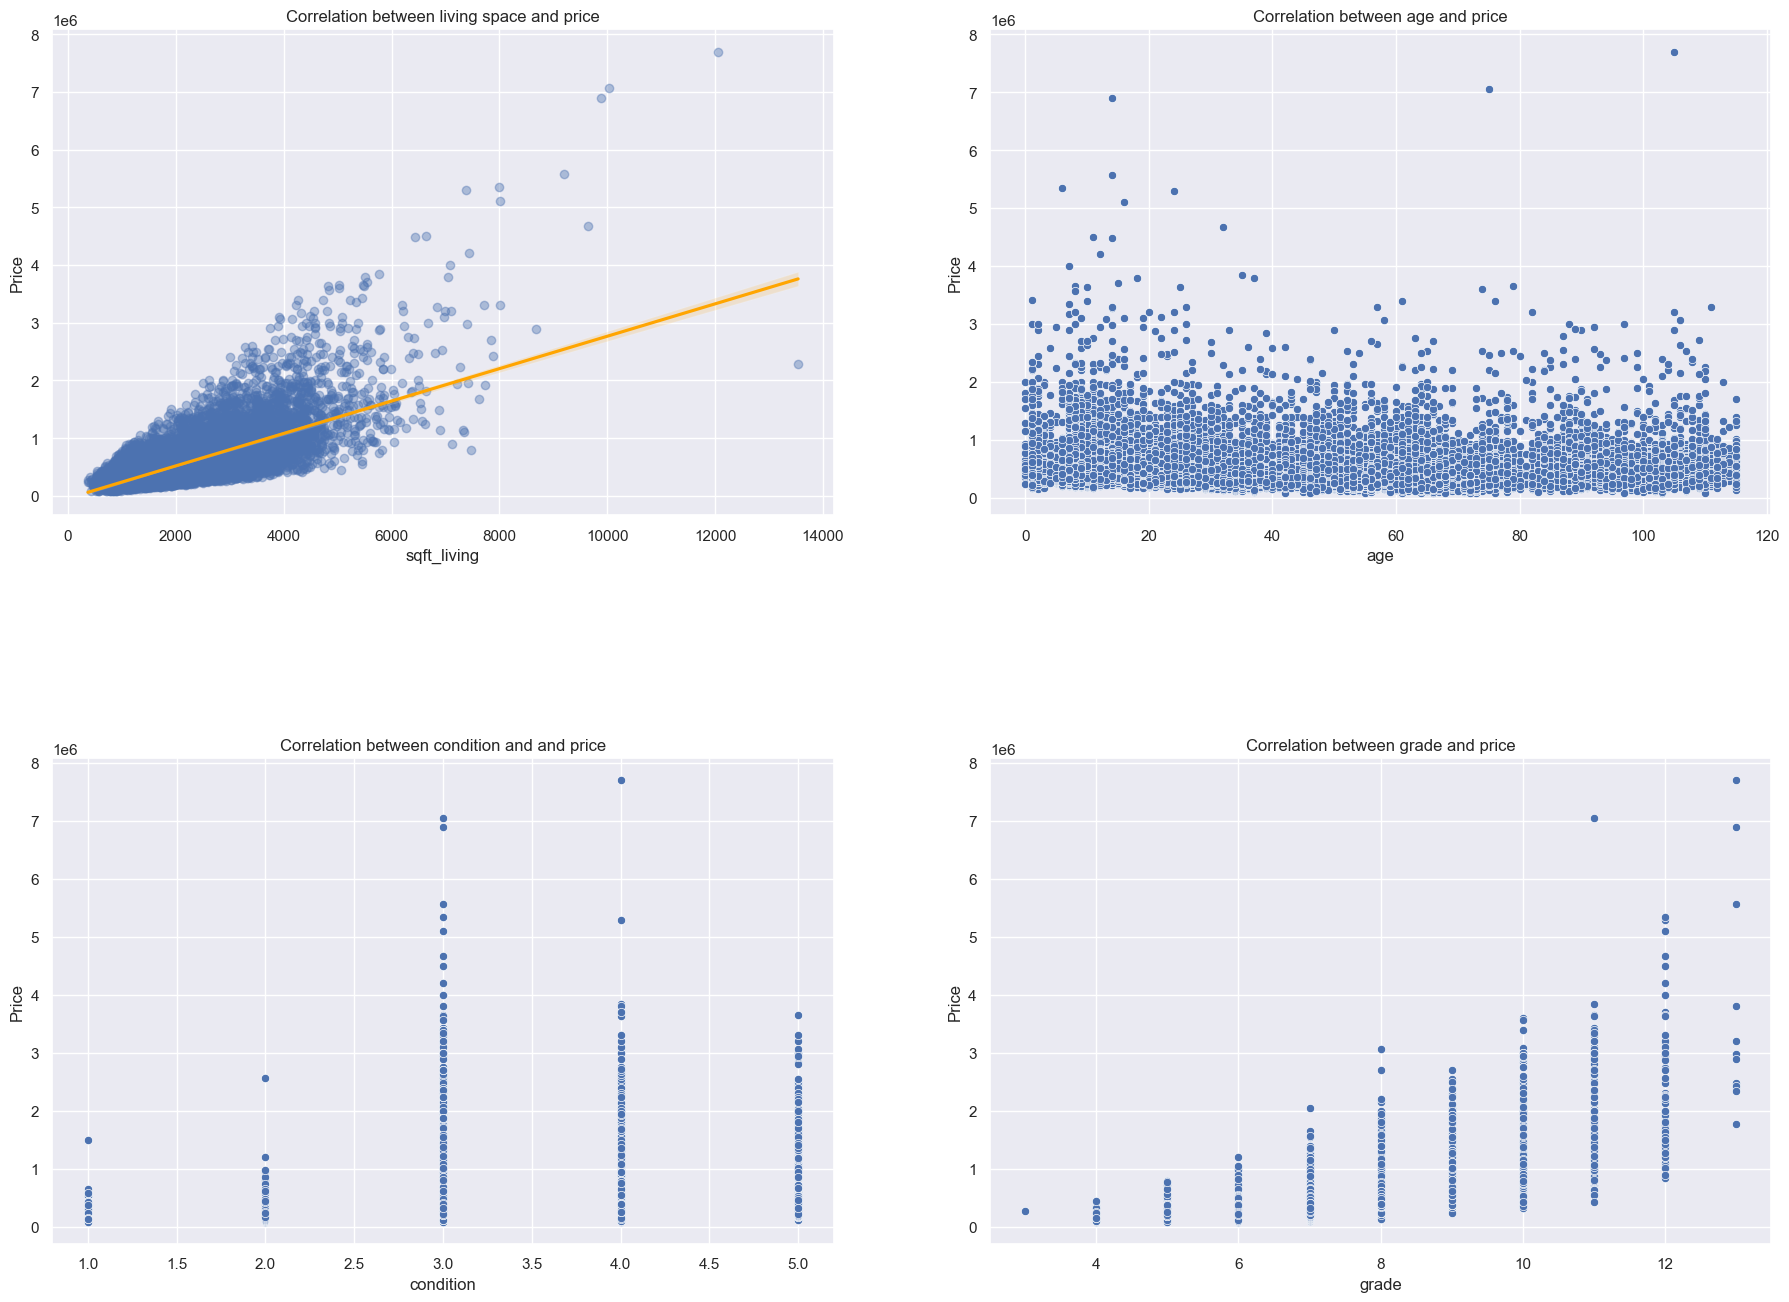

In [ ]:
fig = plt.figure(figsize = (18,14))

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

# Subplot 1 (regression plot) : 
sns.regplot(x='sqft_living',y='price', scatter_kws={'alpha':0.4,}, line_kws={'color':'orange'}, data=df, ax=ax0)
ax0.set_title('Correlation between living space and price')
ax0.set_ylabel('Price')

# Subplot 2 (Scatter plot) :
sns.scatterplot(x='age',y='price', data=df, ax=ax1)
ax1.set_title('Correlation between age and price')
ax1.set_ylabel('Price')

# Subplot 3 (relplot):
sns.scatterplot(x='condition', y='price', data=df, ax=ax2)
#sns.relplot(x='condition', y='price', data=df, ax=ax2) #, scatter_kws={'s':2}) #'alpha':0.3})
ax2.set_title('Correlation between condition and and price')
ax2.set_ylabel('Price')

# Subplot 4 (Regression plot) :
sns.scatterplot(x='grade', y='price', data=df, ax=ax3) #, scatter_kws={'s':2}) #'alpha':0.3})
#sns.relplot(x='grade', y='price', data=df, ax=ax3) #, scatter_kws={'s':2}) #'alpha':0.3})
ax3.set_title('Correlation between grade and price')
ax3.set_ylabel('Price')

plt.show()

##### Observations

+ There is a clear correlation between sqft_living and price.
+ The scatterplot on age shows not correlation.
+ Condition and price aren't correlated.
+ Grade and price are postively correlated. 

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

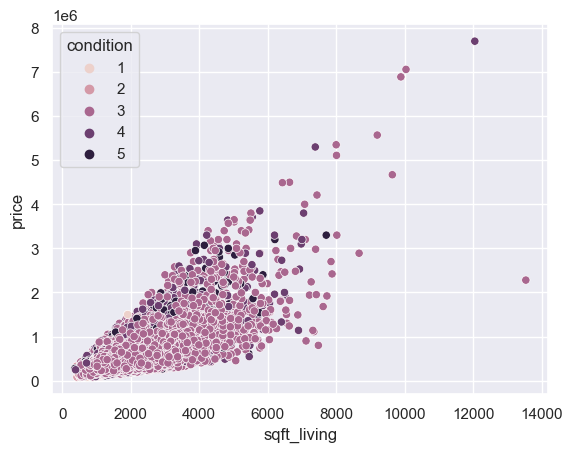

In [ ]:
sns.scatterplot(x='sqft_living', y='price', hue='condition', data=df)

In [ ]:
## Suggestions on what else to visualize
# bath: countplot, distplot
# bed: box
# boxplot (grade, price)
# hist for yr_built
    # sns.histplot(x='age', data=df)
# countplot floors
# boxplot waterfront
# scatterplot long lat hue price
# comp between price and condition

### Geoplotting

Now that we’ve got the correlations set, we’ll take a look at the map to see where our area of interest might be. 

In [ ]:
# set a threshold for outliers in order for the color scale makes sense
df_no_outliers = df[df.price < 2500000]
fig = px.scatter_mapbox(df_no_outliers, lat="lat", lon="long", 
        #hover_name="price", hover_data=["bedrooms", "sqft_living"],
        color="price",# size="car_hours",
        color_continuous_scale=px.colors.sequential.Hot,
        #size="grade",
        zoom=9.4,
        width=900, height=900,
        opacity=0.4,
    )
fig.update_layout(mapbox_style="open-street-map") #open-street-map #stamen-terrain #carto-positron
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
#fig.write_image("data/map_of_dataframe.png")
fig.show()

In [ ]:
n = 20
#zipcut = df.groupby('zipcode').price.mean().nsmallest(n).index
zipcut = df.groupby('zipcode').price.mean().nsmallest(n).index
#df.groupby('zipcode').price.mean().nsmallest(22)

In [ ]:
df_test = df.copy()

In [ ]:
df_test['price_sqft_li'] = df_test.price / df_test.sqft_living
df_test['price_sqft_lot'] = df_test.price / df_test.sqft_lot
df_test['space_around'] = df_test.sqft_lot - df_test.sqft_living

In [ ]:
df_test[['sqft_lot','sqft_living','space_around']].describe()

sqft_lot  sqft_living  space_around
count    21,597.00    21,597.00     21,597.00
mean     15,099.41     2,080.32     13,019.09
std      41,412.64       918.11     41,263.30
min         520.00       370.00     -1,900.00
25%       5,040.00     1,430.00      3,095.00
50%       7,618.00     1,910.00      5,710.00
75%      10,685.00     2,550.00      8,662.00
max   1,651,359.00    13,540.00  1,650,059.00

In [ ]:
df_test[['sqft_lot','sqft_living','space_around']][df_test.sqft_living > df_test.sqft_lot]

sqft_lot  sqft_living  space_around
63         1044         1540          -496
116        1102         1590          -488
175        1100         1120           -20
406        1213         1290           -77
547         649         1070          -421
...         ...          ...           ...
21579       981         1530          -549
21585      1179         1425          -246
21588      1126         1490          -364
21591      1294         1310           -16
21592      1131         1530          -399

[788 rows x 3 columns]

<AxesSubplot: xlabel='price_sqft_li', ylabel='Density'>

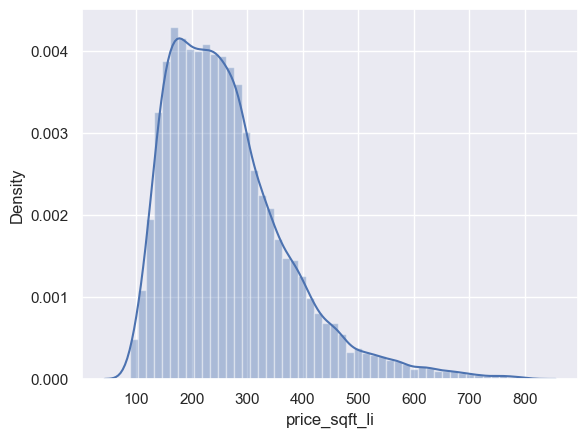

In [ ]:
sns.distplot(df_test.price_sqft_li)

In [ ]:
df.query('zipcode.isin(@zipcut) and condition < 3')


id       date      price  bedrooms  bathrooms  sqft_living  \
38     7895500070 2015-02-13 240,000.00         4       1.00         1220   
1241   1796100140 2014-07-15 170,000.00         3       1.50         1350   
2100   3279000370 2015-02-02 279,000.00         3       2.50         1500   
2139   1623049041 2014-05-08  82,500.00         2       1.00          520   
3199    723049596 2014-05-09 255,000.00         2       1.00          810   
...           ...        ...        ...       ...        ...          ...   
19284  7883606725 2014-11-11 174,900.00         3       1.00         1100   
19348  9485920120 2014-08-29 290,000.00         4       2.50         2340   
19433  2023059052 2015-05-04 450,000.00         3       1.00         1350   
19496  2023049361 2015-03-23 246,500.00         2       1.00          940   
19605  7205400180 2014-12-23 235,000.00         3       1.00         1240   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
38         8075    1.00        0.00  0.00  ...         890         330.00   
1241      81549    1.00        0.00  0.00  ...        1350           0.00   
2100       7350    1.00        0.00  0.00  ...        1060         440.00   
2139      22334    1.00        0.00  0.00  ...         520           0.00   
3199       7980    1.00        0.00  0.00  ...         810           0.00   
...         ...     ...         ...   ...  ...         ...            ...   
19284      6000    1.50        0.00  0.00  ...        1100           0.00   
19348     52272    2.00        0.00  0.00  ...        2340           0.00   
19433     92721    1.00        0.00  0.00  ...        1200         150.00   
19496      6000    1.00        0.00  0.00  ...         940           0.00   
19605     18000    1.00        0.00  0.00  ...        1240           0.00   

       yr_built  zipcode   lat    long  sqft_living15  sqft_lot15  month  age  
38         1969    98001 47.33 -122.28           1290        7800      2   46  
1241       1966    98092 47.31 -122.09           2220       93825      7   49  
2100       1979    98023 47.30 -122.38           1390        7770      2   36  
2139       1951    98168 47.48 -122.30           1572       10570      5   64  
3199       1928    98146 47.49 -122.34           1440        7980      5   87  
...         ...      ...   ...     ...            ...         ...    ...  ...  
19284      1926    98108 47.53 -122.32            960        5880     11   89  
19348      1978    98042 47.35 -122.09           2480       40500      8   37  
19433      1946    98055 47.47 -122.20           1860        8096      5   69  
19496      1954    98148 47.46 -122.33           1890        8547      3   61  
19605      1943    98198 47.35 -122.31           1240       18000     12   72  

[76 rows x 22 columns]

In [ ]:
df.describe()

id        price  bedrooms  bathrooms  sqft_living  \
count        21,597.00    21,597.00 21,597.00  21,597.00    21,597.00   
mean  4,580,474,287.77   540,296.57      3.37       2.12     2,080.32   
std   2,876,735,715.75   367,368.14      0.93       0.77       918.11   
min       1,000,102.00    78,000.00      1.00       0.50       370.00   
25%   2,123,049,175.00   322,000.00      3.00       1.75     1,430.00   
50%   3,904,930,410.00   450,000.00      3.00       2.25     1,910.00   
75%   7,308,900,490.00   645,000.00      4.00       2.50     2,550.00   
max   9,900,000,190.00 7,700,000.00     33.00       8.00    13,540.00   

          sqft_lot    floors  waterfront      view  condition  ...  \
count    21,597.00 21,597.00   21,597.00 21,534.00  21,597.00  ...   
mean     15,099.41      1.49        0.01      0.23       3.41  ...   
std      41,412.64      0.54        0.08      0.77       0.65  ...   
min         520.00      1.00        0.00      0.00       1.00  ...   
25%       5,040.00      1.00        0.00      0.00       3.00  ...   
50%       7,618.00      1.50        0.00      0.00       3.00  ...   
75%      10,685.00      2.00        0.00      0.00       4.00  ...   
max   1,651,359.00      3.50        1.00      4.00       5.00  ...   

       sqft_above  sqft_basement  yr_built   zipcode       lat      long  \
count   21,597.00      21,143.00 21,597.00 21,597.00 21,597.00 21,597.00   
mean     1,788.60         291.85  1,971.00 98,077.95     47.56   -122.21   
std        827.76         442.50     29.38     53.51      0.14      0.14   
min        370.00           0.00  1,900.00 98,001.00     47.16   -122.52   
25%      1,190.00           0.00  1,951.00 98,033.00     47.47   -122.33   
50%      1,560.00           0.00  1,975.00 98,065.00     47.57   -122.23   
75%      2,210.00         560.00  1,997.00 98,118.00     47.68   -122.12   
max      9,410.00       4,820.00  2,015.00 98,199.00     47.78   -121.31   

       sqft_living15  sqft_lot15     month       age  
count      21,597.00   21,597.00 21,597.00 21,597.00  
mean        1,986.62   12,758.28      6.57     44.00  
std           685.23   27,274.44      3.12     29.38  
min           399.00      651.00      1.00      0.00  
25%         1,490.00    5,100.00      4.00     18.00  
50%         1,840.00    7,620.00      6.00     40.00  
75%         2,360.00   10,083.00      9.00     64.00  
max         6,210.00  871,200.00     12.00    115.00  

[8 rows x 21 columns]

In [ ]:
n = 30
zipcut_2 = df_test.groupby('zipcode').price_sqft_li.mean().nsmallest(n).index
#df_test.groupby('zipcode').price_sqft_li.mean().nsmallest(30).index

In [ ]:
# source: https://www.communitiescount.org/population-dashboard
poor = pd.read_csv('data/map1_data.csv', encoding='UTF-16', sep='\t')
poor.head()

Category (Category)  Category_income Default_Indicatorx  Geoname  \
0             Poverty              NaN             pov100    98354   
1             Poverty              NaN             pov100    98288   
2             Poverty              NaN             pov100    98224   
3             Poverty              NaN             pov100    98199   
4             Poverty              NaN             pov100    98198   

             ofKC  Data Not Available      Cat1   CI_LABEL CI_R CommaSign  \
0  of King County               False  ZIP code  (95% CI:     )        ,    
1  of King County               False  ZIP code  (95% CI:     )        ,    
2  of King County               False  ZIP code  (95% CI:     )        ,    
3  of King County               False  ZIP code  (95% CI:     )        ,    
4  of King County               False  ZIP code  (95% CI:     )        ,    

   ... Longitude (generated)  Min. estimate (KC!data)  Min. LB Min. LBP  \
0  ...               -122.32                   233458   219.68     3.07   
1  ...               -121.34                   233458     2.04     5.23   
2  ...               -121.48                   233458     3.68     2.50   
3  ...               -122.40                   233458   466.24     2.30   
4  ...               -122.31                   233458 4,091.16    11.92   

  Min. percent (KC!data) Min. Percent_Count Min. pop_n Min. Pop_pct  Min. UB  \
0                   0.12             449.00        449         6.30   678.32   
1                   0.12              53.00         53        32.10   103.96   
2                   0.12              37.00         37        14.20    70.32   
3                   0.12             821.00        821         4.00 1,175.76   
4                   0.12           5,814.00      5,814        16.90 7,536.84   

   Min. UBP  
0      9.45  
1     59.01  
2     25.86  
3      5.74  
4     21.88  

[5 rows x 30 columns]

In [ ]:
# set a threshold for outliers in order for the color scale makes sense
#df_multi_sell = df[df.id.duplicated() == True]
#df_waterfront = df[df.waterfront.isna()]
#df_target = df[(df.zipcode.isin(zipcut)) & (df.grade < 7) ] #& (df.condition > 3)] #& (df.long < -122.19)]
df_target = df_test[df_test.zipcode.isin(zipcut)]
fig = px.scatter_mapbox(df_test, lat="lat", lon="long", 
        hover_name="price", hover_data=["sqft_living", 'condition', 'grade'],
        color="price",
        color_continuous_scale=px.colors.sequential.Hot,
        size="grade",
        size_max=5,
        zoom=9.3,
        width=900, height=800,
        opacity=0.4,
    )
fig.update_layout(mapbox_style="carto-positron") #open-street-map #stamen-terrain #carto-positron
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
#fig.write_image("data/map_of_duplicated.png")
fig.show()

In [ ]:
df.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221,900.00         3       1.00         1180   
1  6414100192 2014-12-09 538,000.00         3       2.25         2570   
2  5631500400 2015-02-25 180,000.00         2       1.00          770   
3  2487200875 2014-12-09 604,000.00         4       3.00         1960   
4  1954400510 2015-02-18 510,000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650    1.00        0.00  0.00  ...        1180           0.00   
1      7242    2.00        0.00  0.00  ...        2170         400.00   
2     10000    1.00        0.00  0.00  ...         770           0.00   
3      5000    1.00        0.00  0.00  ...        1050         910.00   
4      8080    1.00        0.00  0.00  ...        1680           0.00   

   yr_built  zipcode   lat    long  sqft_living15  sqft_lot15  month  age  
0      1955    98178 47.51 -122.26           1340        5650     10   60  
1      1951    98125 47.72 -122.32           1690        7639     12   64  
2      1933    98028 47.74 -122.23           2720        8062      2   82  
3      1965    98136 47.52 -122.39           1360        5000     12   50  
4      1987    98074 47.62 -122.05           1800        7503      2   28  

[5 rows x 22 columns]

In [ ]:
# heatmap for house prices by zipcode

In [ ]:
df[df.zipcode.isin(zipcut)]

id       date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221,900.00         3       1.00         1180   
6      1321400060 2014-06-27 257,500.00         3       2.25         1715   
7      2008000270 2015-01-15 291,850.00         3       1.50         1060   
8      2414600126 2015-04-15 229,500.00         3       1.00         1780   
18       16000397 2014-12-05 189,000.00         2       1.00         1200   
...           ...        ...        ...       ...        ...          ...   
21569  3832050760 2014-08-28 270,000.00         3       2.50         1870   
21575  4140940150 2014-10-02 572,000.00         4       2.75         2770   
21578  5087900040 2014-10-17 350,000.00         4       2.75         2500   
21582  8956200760 2014-10-13 541,800.00         4       2.50         3118   
21593  6600060120 2015-02-23 400,000.00         4       2.50         2310   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0          5650    1.00        0.00  0.00  ...        1180           0.00   
6          6819    2.00        0.00  0.00  ...        1715            NaN   
7          9711    1.00        0.00   NaN  ...        1060           0.00   
8          7470    1.00        0.00  0.00  ...        1050         730.00   
18         9850    1.00        0.00  0.00  ...        1200            NaN   
...         ...     ...         ...   ...  ...         ...            ...   
21569      5000    2.00        0.00  0.00  ...        1870           0.00   
21575      3852    2.00        0.00  0.00  ...        2770           0.00   
21578      5995    2.00        0.00  0.00  ...        2500           0.00   
21582      7866    2.00        0.00  2.00  ...        3118           0.00   
21593      5813    2.00        0.00  0.00  ...        2310           0.00   

       yr_built  zipcode   lat    long  sqft_living15  sqft_lot15  month  age  
0          1955    98178 47.51 -122.26           1340        5650     10   60  
6          1995    98003 47.31 -122.33           2238        6819      6   20  
7          1963    98198 47.41 -122.31           1650        9711      1   52  
8          1960    98146 47.51 -122.34           1780        8113      4   55  
18         1921    98002 47.31 -122.21           1060        5095     12   94  
...         ...      ...   ...     ...            ...         ...    ...  ...  
21569      2009    98042 47.33 -122.06           2170        5399      8    6  
21575      2014    98178 47.50 -122.23           1810        5641     10    1  
21578      2008    98042 47.37 -122.11           2530        5988     10    7  
21582      2014    98001 47.29 -122.26           2673        6500     10    1  
21593      2014    98146 47.51 -122.36           1830        7200      2    1  

[5660 rows x 22 columns]

In [ ]:
# create an area code with which we can group and plot
df = df.assign(area_code = lambda x: x.zipcode.astype('str').str.slice(start=0, stop=4))

In [ ]:
#df.zipcode.value_counts(dropna=False)
df.groupby('area_code').price.mean()

area_code
9800   665,165.47
9801   451,890.84
9802   462,551.54
9803   504,486.04
9804   576,015.18
9805   500,243.58
9806   529,629.78
9807   673,167.15
9809   334,921.06
9810   582,537.22
9811   637,987.68
9812   500,074.81
9813   444,327.82
9814   470,580.02
9815   423,736.91
9816   349,113.23
9817   491,039.63
9818   289,078.35
9819   562,704.59
Name: price, dtype: float64

Three of them actually stick out as cheaper than the rest. Let’s try to map them.

In [ ]:
df_poor = df[df.zipcode.astype('str').startswith(('9809','9816','9818'))]

AttributeError: 'Series' object has no attribute 'startswith'

In [ ]:
df.zipcode.astype('str').str.startswith(('9809','9816','9818')).value_counts()

False    20587
True      1010
Name: zipcode, dtype: int64